In [139]:
!pip install openpyxl matplotlib

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
np.random.seed(1)
n = 1000
dates = pd.date_range(start='2045-01-01', periods=n, freq='D')
products = ['Tablet', 'Camera', 'Phone']
prices = np.round(np.random.uniform(50, 200, n), 2)
quantities = np.random.randint(1, 15, n)
data = {
    'date': dates,
    'product': np.random.choice(products, n),
    'price': prices,
    'quantities': quantities,
}

In [142]:
df = pd.DataFrame(data)
df.head()

,date,product,price,quantities
0,2045-01-01,Phone,112.55,14
1,2045-01-02,Tablet,158.05,8
2,2045-01-03,Phone,50.02,7
3,2045-01-04,Camera,95.35,8
4,2045-01-05,Phone,72.01,13


In [143]:
df.to_csv('random_sales.csv', index=False)

In [144]:
new_df = pd.read_csv('random_sales.csv', parse_dates=['date'])  # also we could reassign variable df
new_df

,date,product,price,quantities
0,2045-01-01,Phone,112.55,14
1,2045-01-02,Tablet,158.05,8
2,2045-01-03,Phone,50.02,7
3,2045-01-04,Camera,95.35,8
4,2045-01-05,Phone,72.01,13
...,...,...,...,...
995,2047-09-23,Camera,196.16,5
996,2047-09-24,Tablet,96.76,6
997,2047-09-25,Phone,150.32,10
998,2047-09-26,Phone,98.90,6


In [145]:
df.to_excel('sales_data.xlsx')  # excel

In [146]:
df.to_json('sales_data.json')  # json

In [147]:
df.describe()

,date,price,quantities
count,1000,1000.000000,1000.00000
mean,2046-05-15 11:59:59.999999488,125.090560,7.28100
min,2045-01-01 00:00:00,50.020000,1.00000
25%,2045-09-07 18:00:00,87.787500,4.00000
50%,2046-05-15 12:00:00,126.125000,7.00000
75%,2047-01-20 06:00:00,162.597500,11.00000
max,2047-09-27 00:00:00,199.600000,14.00000
std,NaN,43.275088,4.03464


In [148]:
df.values

array([[Timestamp('2045-01-01 00:00:00'), 'Phone', 112.55, 14],
       [Timestamp('2045-01-02 00:00:00'), 'Tablet', 158.05, 8],
       [Timestamp('2045-01-03 00:00:00'), 'Phone', 50.02, 7],
       ...,
       [Timestamp('2047-09-25 00:00:00'), 'Phone', 150.32, 10],
       [Timestamp('2047-09-26 00:00:00'), 'Phone', 98.9, 6],
       [Timestamp('2047-09-27 00:00:00'), 'Tablet', 166.17, 3]],
      shape=(1000, 4), dtype=object)

In [149]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [150]:
products_sales = df.groupby('product')['quantities'].sum()
products_sales

product
Camera    2461
Phone     2436
Tablet    2384
Name: quantities, dtype: int64

In [151]:
average_sales = df.groupby('product')['price'].mean()
average_sales

product
Camera    123.840199
Phone     124.764112
Tablet    126.748079
Name: price, dtype: float64

# visualisation


In [152]:
print(products_sales.values)

[2461 2436 2384]


In [153]:
print(products_sales.index)

Index(['Camera', 'Phone', 'Tablet'], dtype='object', name='product')


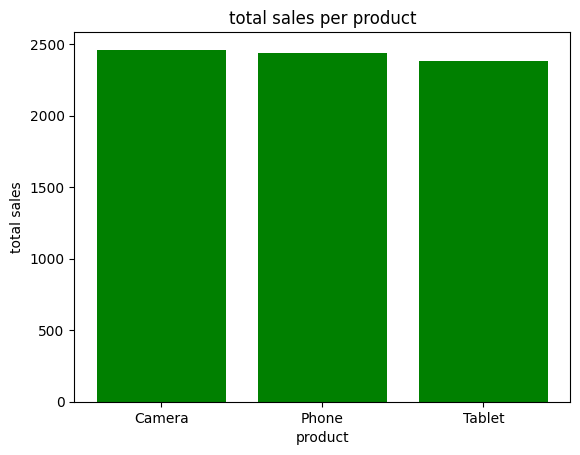

In [160]:
plt.bar(products_sales.index, products_sales.values, color=['green'])
plt.title('total sales per product')
plt.xlabel('product')
plt.ylabel('total sales')
plt.show()

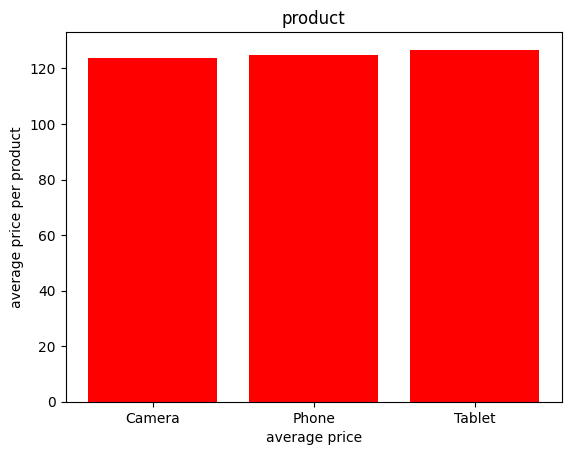

In [167]:
plt.bar(average_sales.index, average_sales.values, color=['red'])
plt.title('product')
plt.xlabel('average price')
plt.ylabel('average price per product')
plt.show()